# Supply Chain & Retail Performance Analysis
### Business Case Study

## Business Problem

Retail management wants to understand:
- Which products drive the most revenue?
- Where profitability is strongest?
- Whether inventory is balanced with demand?
- How supplier and logistics performance affect operations?

The goal is to provide actionable insights to improve revenue, reduce costs, and optimize supply chain efficiency.

In [4]:
#importing necessary libraries
import pandas as pd # for managing the data
import numpy as np # for mathematical operations
import seaborn as sns
import matplotlib.pyplot as plt
import os

## Inspect the Dataset
Data inspection involves checking the structure, data types, and missing values in the dataset.
It is very useful in understanding data quality issues before cleaning and identifying what needs fixing

In [6]:
#loading the dataset and checking top 5
df = pd.read_excel("Supply_Chain.xlsx")
df.head()

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Longitude,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,72.8777,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,72.8777,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,72.8777,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,88.3639,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,77.2090,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
# checking number of rows and columns
df.shape

(100, 26)

In [8]:
#checking last row
df.tail(1)

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,Lead_times,Order_quantities,...,Longitude,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,80.2707,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [9]:
#checking information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products_sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   Lead_times               100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier_name            100 non-null    object 
 14  Location                 10

In [10]:
df.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Latitude,Longitude,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,19.083383,79.726587,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,5.559015,5.577598,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,12.971600,72.877700,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,13.082700,77.209000,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,19.076000,77.594600,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,22.572600,82.294000,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,28.613900,88.363900,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


## Quick Descriptive Statistics Insights

- Prices and revenue show high variability; some products generate much more revenue than others.  
- Availability and stock levels vary widely, highlighting differences in product accessibility.  
- Number of products sold and defect rates indicate most products sell moderately with generally low defects.  
- Lead times, shipping times, and manufacturing lead times are consistent, suggesting predictable supply chain performance.

In [12]:
df.columns

Index(['Product_type', 'SKU', 'Price', 'Availability',
       'Number_of_products_sold', 'Revenue_generated', 'Customer_demographics',
       'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
       'Shipping_carriers', 'Shipping_costs', 'Supplier_name', 'Location',
       'Latitude', 'Longitude', 'Lead_time', 'Production_volumes',
       'Manufacturing_lead_time', 'Manufacturing_costs', 'Inspection_results',
       'Defect_rates', 'Transportation_modes', 'Routes', 'Costs'],
      dtype='object')

| Column                     | Description                                                                                 |
|----------------------------|---------------------------------------------------------------------------------------------|
| Product_type               | Type or category of the product (e.g., haircare, skincare)                                |
| SKU                        | Stock Keeping Unit, unique product identifier                                               |
| Price                      | Unit price of the product                                                                   |
| Availability               | “Score indicating product availability in stock (1 = very low, 100 = fully available)                                    
| Number_of_products_sold    | Total quantity of this product sold                                                        |
| Revenue_generated          | Total revenue generated from this product                                                  |
| Customer_demographics      | Customer segment information (e.g., age group, gender)                                     |
| Stock_levels               | Current inventory level of the product                                                    |
| Lead_times                 | General lead duration from order to receipt of products                                    |
| Order_quantities           | Quantity of products per order                                                             |
| Shipping_times             | Duration taken to ship the product to the customer                                         |
| Shipping_carriers          | Name of the shipping service used                                                         |
| Shipping_costs             | Cost incurred to ship the product                                                          |
| Supplier_name              | Name of the supplier supplying the product                                                |
| Location                   | Warehouse or distribution center location                                                 |
| Latitude                   | Latitude coordinate of warehouse/location                                                 |
| Longitude                  | Longitude coordinate of warehouse/location                                                |
| Lead_time                  | Supplier-specific lead duration                                                            |
| Production_volumes         | Number of products manufactured                                                          |
| Manufacturing_lead_time    | Duration required to manufacture the products                                             |
| Manufacturing_costs        | Cost incurred in manufacturing the product                                               |
| Inspection_results         | Quality inspection outcome (e.g., Pass/Fail/Pending)                                      |
| Defect_rates               | Percentage of defective products in production                                           |
| Transportation_modes       | Mode of transportation used for delivery (e.g., air, sea, road)                           |
| Routes                     | Delivery route for the product                                                            |
| Costs                      | Total cost associated with the product (manufacturing + shipping + others)                |

In [14]:
df.duplicated().sum()

0

**  Rounded financial and ratio columns to 2 decimal places for readability. 
Columns affected: `Price`, `Revenue_generated`, `Shipping_costs`, `Manufacturing_costs`, `Costs`, `Defect_rates`. **

**  Rounded financial and ratio columns to 2 decimal places for readability. 
Columns affected: `Price`, `Revenue_generated`, `Shipping_costs`, `Manufacturing_costs`, `Costs`, `Defect_rates`. **

In [17]:
# List of columns to round
float_cols = [
    "Price",
    "Revenue_generated",
    "Shipping_costs",
    "Manufacturing_costs",
    "Costs",
    "Defect_rates"
]

# Round to 2 decimal places
df[float_cols] = df[float_cols].round(2)

** Verified that Lead_times (general lead duration) and Lead_time (supplier-specific lead duration) are not duplicates. 
They will be analyzed separately. **

In [19]:
(df["Lead_times"] == df["Lead_time"]).all()

False

In [20]:
# Renamed columns to be more descriptive for clarity and professional presentation.
df.rename(columns={
    "Lead_times": "General_Lead_Time",
    "Lead_time": "Supplier_Lead_Time"
}, inplace=True)

In [21]:
df.head(1)

,Product_type,SKU,Price,Availability,Number_of_products_sold,Revenue_generated,Customer_demographics,Stock_levels,General_Lead_Time,Order_quantities,...,Longitude,Supplier_Lead_Time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Inspection_results,Defect_rates,Transportation_modes,Routes,Costs
0,haircare,SKU0,69.81,55,802,8662.0,Non-binary,58,7,96,...,72.8777,29,215,29,46.28,Pending,0.23,Road,Route B,187.75


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product_type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number_of_products_sold  100 non-null    int64  
 5   Revenue_generated        100 non-null    float64
 6   Customer_demographics    100 non-null    object 
 7   Stock_levels             100 non-null    int64  
 8   General_Lead_Time        100 non-null    int64  
 9   Order_quantities         100 non-null    int64  
 10  Shipping_times           100 non-null    int64  
 11  Shipping_carriers        100 non-null    object 
 12  Shipping_costs           100 non-null    float64
 13  Supplier_name            100 non-null    object 
 14  Location                 10

In [23]:
# Save as CSV
df.to_csv("Supply_chain_cleaned.csv", index=False)

In [24]:
df = pd.read_csv("Supply_chain_cleaned.csv")

# Exploratory Data Analysis (EDA)

# Section A: Revenue & Sales Performance
- Total revenue
- Top product
- Revenue distribution plot

In [27]:
#Total Revenue
total_revenue = round(df["Revenue_generated"].sum(), 2)
print("Total Revenue:", total_revenue)

Total Revenue: 577604.86


In [28]:
# Top Products by Revenue
top_products = df.groupby("Product_type")["Revenue_generated"].sum().sort_values(ascending=False)
print(top_products.head())

Product_type
skincare     241628.17
haircare     174455.42
cosmetics    161521.27
Name: Revenue_generated, dtype: float64


### Revenue Distribution by Product Type

Revenue is concentrated across three product categories, with **Skincare generating the highest total revenue (241,628.17)**, 
followed by Haircare (174,455.42) and Cosmetics (161,521.27).

This indicates that Skincare is the primary revenue driver and should be prioritized in inventory planning, marketing allocation, 
and supplier management strategies.

In [30]:
# Average Order Value
average_order_value = df["Revenue_generated"].mean()
print("Average Order Value:", round(average_order_value,2))

Average Order Value: 5776.05


In [31]:
# Total Units Sold – sum of Number_of_products_sold
total_units_sold = df["Number_of_products_sold"].sum()
print("total_units_sold:", total_units_sold)

total_units_sold: 46099


### Key Performance Indicators (KPIs)

- **Total Revenue:** 577,604.86  
- **Average Order Value:** 5,776.05  
- **Total Units Sold:** 46,099  

The business demonstrates strong overall sales volume, with consistent revenue generation across products. 
The high average order value suggests solid pricing strategy and demand strength.

C:\Users\HP\AppData\Local\Temp\ipykernel_11656\3631005470.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Revenue_generated", y="Product_type", data=top_products, palette="viridis")


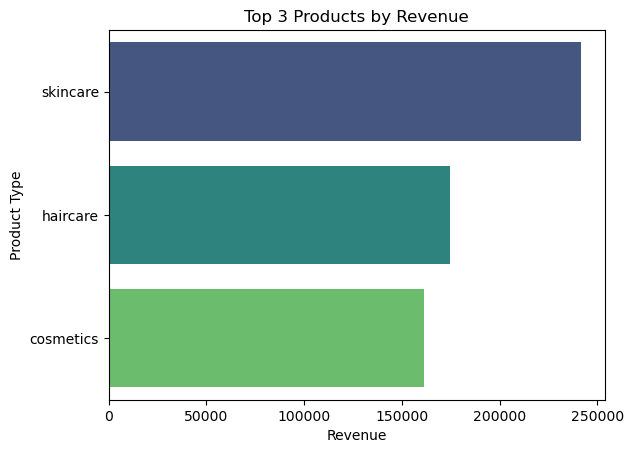

In [33]:
# Top products by revenue
top_products = top_products.head().reset_index()
sns.barplot(x="Revenue_generated", y="Product_type", data=top_products, palette="viridis")
plt.title("Top 3 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product Type")
plt.savefig("Top 3 Products by Revenue")
plt.show()

In [34]:
#`Revenue Concentration (Pareto Insight)
# Check if 20% of products generate 80% of revenue.
revenue_by_product = df.groupby("Product_type")["Revenue_generated"].sum().sort_values(ascending=False)

revenue_share = revenue_by_product.cumsum() / revenue_by_product.sum()
revenue_share

Product_type
skincare     0.418328
haircare     0.720360
cosmetics    1.000000
Name: Revenue_generated, dtype: float64

In [35]:
# Revenue per Supplier – shows which supplier is generating most revenue
revenue_supplier = df.groupby("Supplier_name")["Revenue_generated"].sum().sort_values(ascending=False)
revenue_supplier.head(1)

Supplier_name
Supplier 1    157528.98
Name: Revenue_generated, dtype: float64

In [36]:
# Customer Segment KPIs – revenue per demographic
revenue_by_segment = df.groupby("Customer_demographics")["Revenue_generated"].sum()
revenue_by_segment

Customer_demographics
Female        161514.49
Male          126634.42
Non-binary    116365.81
Unknown       173090.14
Name: Revenue_generated, dtype: float64

### Revenue & Profit by Customer Demographics

The highest revenue comes from the **Unknown segment (173,090.14)**, followed by Female customers (161,514.49).

Profit trends follow a similar pattern, with the Unknown and Female segments contributing the most to profitability.

This suggests strong demand across segments, though further customer identification may help improve targeted marketing strategies.

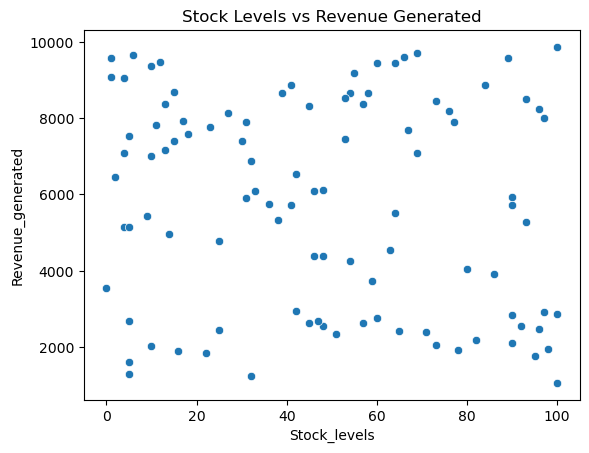

In [38]:
# Analyze Stock_levels vs Revenue_generated:
sns.scatterplot(x="Stock_levels", y="Revenue_generated", data=df)
plt.title("Stock Levels vs Revenue Generated")
plt.savefig("Stock Levels vs Revenue Generated")
plt.show()

# Section B: Profitability Analysis
- Profit & margin
- Top profit products
- Cost breakdown chart

In [40]:
#Profit per Product – Revenue minus Costs
df["Profit"] = df["Revenue_generated"] - df["Costs"]
top_profit_products = df.groupby("Product_type")["Profit"].sum().sort_values(ascending=False)
top_profit_products

Product_type
skincare     219398.85
haircare     157126.58
cosmetics    148154.86
Name: Profit, dtype: float64

### Profitability by Product Type

Skincare generates the highest total profit (219,398.85), followed by Haircare (157,126.58) and Cosmetics (148,154.86).

This confirms that Skincare is not only the top revenue contributor but also the most profitable category,
making it strategically important for growth and investment.

C:\Users\HP\AppData\Local\Temp\ipykernel_11656\3268945984.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Profit", y="Product_type", data=top_profit_products, palette="viridis")


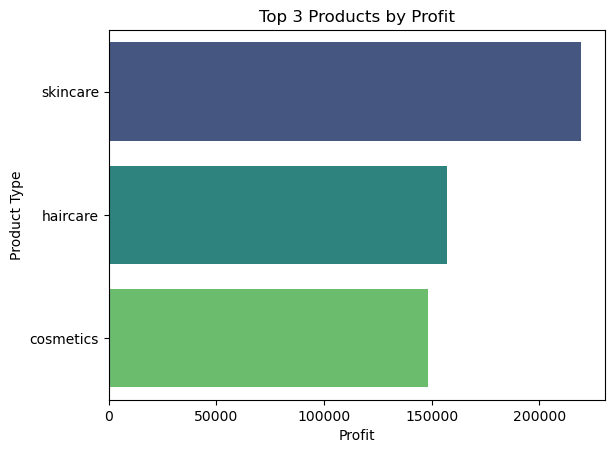

In [42]:
# Top products by revenue
top_profit_products = top_profit_products.head().reset_index()
sns.barplot(x="Profit", y="Product_type", data=top_profit_products, palette="viridis")
plt.title("Top 3 Products by Profit")
plt.xlabel("Profit")
plt.ylabel("Product Type")
plt.savefig("Top 3 Products by Profit")
plt.show()

In [43]:
# Profit Margin Analysis
df["Profit"] = df["Revenue_generated"] - df["Costs"]
df["Profit_Margin_%"] = (df["Profit"] / df["Revenue_generated"]) * 100

In [44]:
# Customer Segment Behavior
df.groupby("Customer_demographics")["Profit"].sum()

Customer_demographics
Female        148559.60
Male          114009.66
Non-binary    104695.90
Unknown       157415.13
Name: Profit, dtype: float64

In [45]:
# Average Shipping Costs & Manufacturing Costs – identify expensive products
avg_shipping = df["Shipping_costs"].mean()
avg_manufacturing = df["Manufacturing_costs"].mean()
print("Average Shipping:", avg_shipping)
print("Average Manufacturing:", avg_manufacturing)


Average Shipping: 5.548199999999998
Average Manufacturing: 47.266400000000004


### Operational Cost Overview

- Average Shipping Time: 5.55 days  
- Average Manufacturing Cost: 47.27  

Shipping times are relatively stable and short, indicating efficient logistics operations. 
Manufacturing costs remain moderate, suggesting controlled production expenditure.

# Section C: Inventory & Availability
- Stock vs Sales
- Overstock/Understock analysis
- Availability correlation

In [48]:
# Stock Coverage Ratio – ratio of Stock_levels to Number_of_products_sold
df["Stock_Coverage"] = df["Stock_levels"] / df["Number_of_products_sold"]

In [49]:
# Overstock vs Understock Risk
# Create stock risk indicator:
df["Stock_Risk"] = df["Stock_levels"] - df["Number_of_products_sold"]

Interpretation:
Negative → Risk of stockout
Very high positive → Overstock risk
Business Insight:
Identify products tying up capital in excess inventory.

In [51]:
# High availability + low sales → marketing problem
# Low availability + high sales → supply problem
df[["Availability", "Number_of_products_sold"]].corr()

,Availability,Number_of_products_sold
Availability,1.000000,0.087496
Number_of_products_sold,0.087496,1.000000


### Availability vs Sales Correlation

The correlation between Availability and Units Sold is very weak (0.087).

This indicates that higher availability does not strongly drive sales performance. Sales may instead be influenced by demand, 
pricing, or product preference rather than stock levels alone.

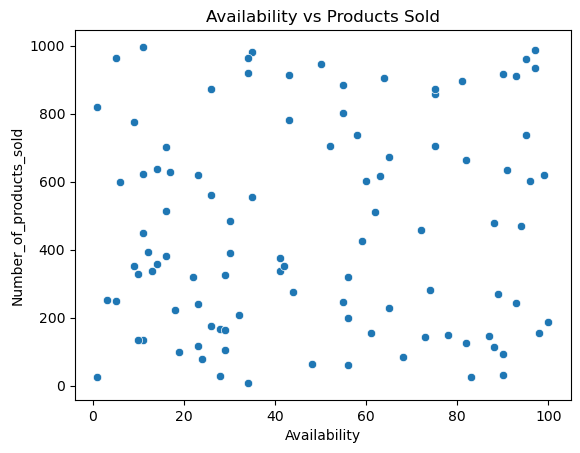

In [53]:
# Analyze Availability vs Number of Products Sold:
sns.scatterplot(x="Availability", y="Number_of_products_sold", data=df)
plt.title("Availability vs Products Sold")
plt.savefig("Availability vs Products Sold")
plt.show()

# Section D: Supplier & Operational Efficiency
- Lead times
- Defect rates
- Supplier ranking

In [55]:
# Operational Stability Insight
# Check variability:
df[["General_Lead_Time", "Shipping_times", "Manufacturing_lead_time"]].std()

General_Lead_Time          8.785801
Shipping_times             2.724283
Manufacturing_lead_time    8.912430
dtype: float64

### Supply Chain Stability

Standard deviations:
- General Lead Time: 8.79
- Shipping Time: 2.72
- Manufacturing Lead Time: 8.91

Shipping time is the most stable operational metric, while lead times show higher variability. 
This suggests potential inconsistencies in supplier or production scheduling.

In [57]:
# Quality vs Profit Tradeoff
df[["Defect_rates", "Profit"]].corr()

,Defect_rates,Profit
Defect_rates,1.000000,-0.128183
Profit,-0.128183,1.000000


### Quality Impact on Profitability

The correlation between Defect Rates and Profit is slightly negative (-0.13).

This suggests that higher defect rates may marginally reduce profitability. 
Improving quality control could enhance profit margins and reduce operational waste.

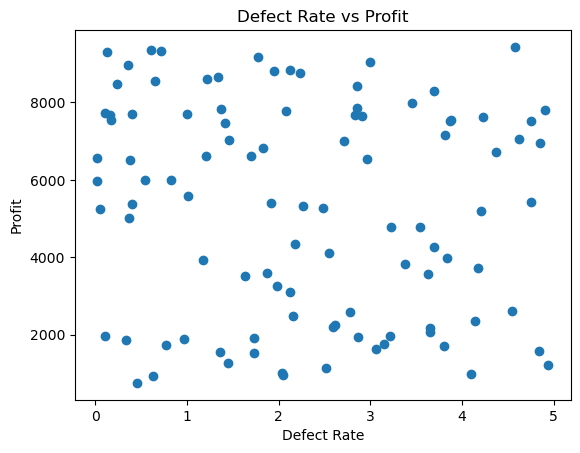

In [59]:
plt.figure()
plt.scatter(df["Defect_rates"], df["Profit"])
plt.title("Defect Rate vs Profit")
plt.xlabel("Defect Rate")
plt.ylabel("Profit")
plt.savefig("Defect Rate vs Profit")
plt.show()

In [60]:
# Defect Rate Insights – average defect rate by product type or supplier
defect_by_product = df.groupby("Product_type")["Defect_rates"].mean().sort_values()
defect_by_product

Product_type
cosmetics    1.918462
skincare     2.334500
haircare     2.483824
Name: Defect_rates, dtype: float64

### Product Quality Comparison

Cosmetics has the lowest average defect rate (1.92), while Haircare shows the highest (2.48).

This indicates that Haircare products may require stronger quality control processes to improve efficiency and reduce potential losses.

In [62]:
# Average Lead Times – both general and supplier-specific
avg_lead = df[["General_Lead_Time", "Supplier_Lead_Time"]].mean()
avg_lead

General_Lead_Time     15.96
Supplier_Lead_Time    17.08
dtype: float64

# Section E: Logistics Performance
- Shipping time vs cost
- Carrier efficiency 

In [64]:
# Regional Performance Insight
region_summary = df.groupby("Location").agg({
    "Revenue_generated": "sum",
    "Profit": "sum",
    "Shipping_times": "mean"
})
print("Region summary:", region_summary)

Region summary:            Revenue_generated     Profit  Shipping_times
Location                                               
Bangalore          102601.73   92041.01        5.277778
Chennai            119142.84  106707.82        6.000000
Delhi               81027.72   72804.15        5.933333
Kolkata            137077.55  124795.81        5.960000
Mumbai             137755.02  128331.50        5.545455


### Regional Performance Analysis

Mumbai and Kolkata generate the highest revenue and profit, making them the strongest performing regions.

Chennai also shows strong profitability, while Delhi generates comparatively lower revenue.

Shipping times are relatively consistent across regions, indicating stable logistics performance nationwide.

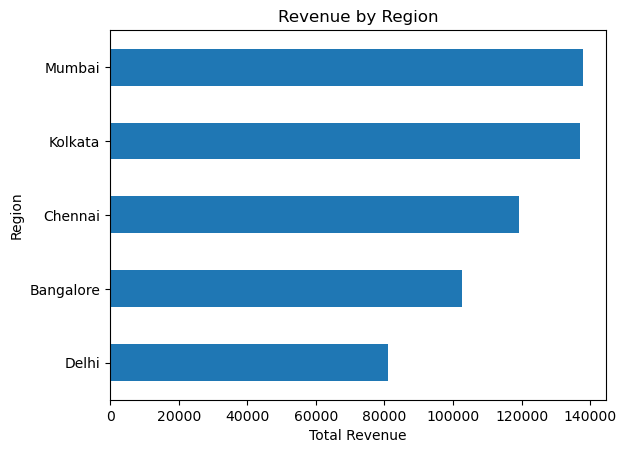

In [66]:
region_revenue = df.groupby("Location")["Revenue_generated"].sum().sort_values()

plt.figure()
region_revenue.plot(kind="barh")
plt.title("Revenue by Region")
plt.xlabel("Total Revenue")
plt.ylabel("Region")
plt.savefig("Revenue by Region")
plt.show()

In [67]:
# Supplier Performance Score
#Combine revenue, defect rate, and lead time:
supplier_summary = df.groupby("Supplier_name").agg({
    "Revenue_generated": "sum",
    "Defect_rates": "mean",
    "Supplier_Lead_Time": "mean"
}).sort_values("Revenue_generated", ascending=False)
supplier_summary

,Revenue_generated,Defect_rates,Supplier_Lead_Time
Supplier_name,,,
Supplier 1,157528.98,1.803333,14.777778
Supplier 2,125467.45,2.361818,18.545455
Supplier 5,110343.48,2.665000,18.055556
Supplier 3,97795.98,2.466000,20.133333
Supplier 4,86468.97,2.338889,15.222222


### Supplier Performance Analysis

Supplier 1 generated the highest revenue (157,528.98), indicating strong contribution to overall sales.

When evaluating supplier performance:
- Supplier 1 also has the lowest defect rate (1.80) and relatively short lead time (14.78 days),
making it the most operationally efficient supplier.

Suppliers with higher defect rates and longer lead times may require performance review or renegotiation.

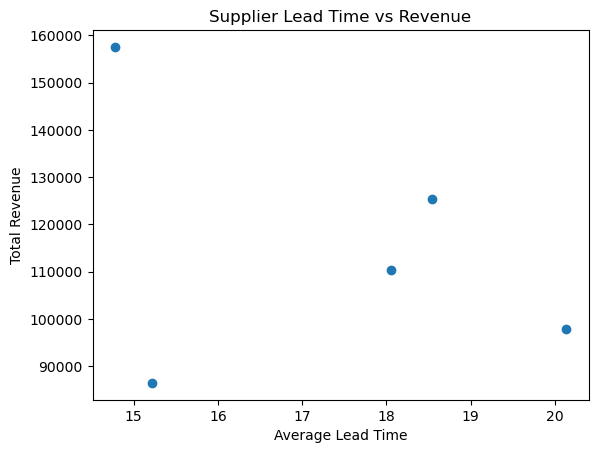

In [69]:
supplier_summary = df.groupby("Supplier_name").agg({
    "Revenue_generated": "sum",
    "Supplier_Lead_Time": "mean"
})

plt.figure()
plt.scatter(supplier_summary["Supplier_Lead_Time"],
            supplier_summary["Revenue_generated"])

plt.title("Supplier Lead Time vs Revenue")
plt.xlabel("Average Lead Time")
plt.ylabel("Total Revenue")
plt.savefig("Suppliers Revenue and Lead Time")
plt.show()

In [70]:
# Logistics Efficiency Insight
# Compare shipping time vs shipping cost:
df[["Shipping_times", "Shipping_costs"]].corr()

,Shipping_times,Shipping_costs
Shipping_times,1.000000,0.044986
Shipping_costs,0.044986,1.000000


### Shipping Cost vs Delivery Time

The correlation between Shipping Time and Shipping Cost is extremely weak (0.045).

This suggests that faster delivery does not necessarily cost more, indicating potential inefficiencies or flat-rate logistics pricing structures.

In [72]:
summary_df = pd.DataFrame({
    "KPI": ["Total Revenue", "Average Order Value"],
    "Value": [total_revenue, round(average_order_value,2)]
})
summary_df.to_csv("KPI_Summary.csv", index=False)


# Executive Summary – Supply Chain & Sales Performance Analysis

## Overview
This analysis evaluates product performance, supply chain efficiency, and operational effectiveness using a retail supply chain dataset. The objective is to identify revenue drivers, profitability patterns, inventory risks, and operational improvement opportunities.

---

## Key KPIs

- **Total Revenue:** 577,604.86
- **Total Units Sold:** 46,099
- **Average Order Value (AOV):** 5,776.05
- **Average Profit Margin:** 87.44%
- **Average Lead Time:** General_Lead_Time     15.96
                         Supplier_Lead_Time    17.08
  
- **Average Shipping Time:** 5.55

---

## Key Insights

# Final Executive Summary

This analysis evaluated revenue performance, profitability, supplier efficiency, operational stability, and regional trends within the retail supply chain.

Key findings show that Skincare is the dominant revenue and profit driver. Supplier 1 is the most efficient supplier based on revenue contribution, defect rates, and lead time performance.

Regional analysis indicates Mumbai and Kolkata as the strongest markets. Shipping operations remain stable, though supplier lead times show variability.

Availability does not strongly influence sales, suggesting demand-driven purchasing behavior. Additionally, defect rates show a slight negative impact on profitability, highlighting opportunities for quality improvement.

Overall, the business demonstrates strong revenue performance and operational stability, with opportunities to optimize supplier management, improve product quality in specific categories, and refine regional inventory allocation strategies.

# Strategic Recommendations

Based on the analysis of revenue, profitability, supplier performance, quality metrics, and regional trends, the following strategic actions are recommended:



## 1️⃣ Prioritize High-Performing Product Categories

Skincare is the strongest revenue and profit driver. The company should:
- Allocate more inventory to high-demand skincare products.
- Increase marketing investment in this category.
- Strengthen supplier relationships supporting this segment.

This will maximize revenue growth and margin expansion.



## 2️⃣ Improve Quality in High-Defect Categories

Haircare products show the highest defect rates. Since defect rates have a negative relationship with profit, improving quality control in this category could:
- Reduce operational waste
- Improve customer satisfaction
- Increase profit margins

Quality audits and supplier reviews are recommended.



## 3️⃣ Optimize Supplier Strategy

Supplier 1 demonstrates strong performance (high revenue contribution, low defect rate, shorter lead time).

Actions:
- Consider increasing procurement volume from high-performing suppliers.
- Review performance agreements with lower-performing suppliers.
- Implement supplier scorecards based on revenue, lead time, and defect rate.



## 4️⃣ Rebalance Inventory Allocation

The weak correlation between availability and sales suggests that simply increasing stock does not guarantee higher revenue.

Recommendation:
- Reduce excess inventory for slow-moving products.
- Increase stock levels only for high-demand, high-margin items.
- Use demand-based forecasting rather than stock-based allocation.



## 5️⃣ Strengthen Regional Focus

Mumbai and Kolkata are the strongest performing regions in terms of revenue and profit.

Strategic Actions:
- Expand marketing campaigns in top-performing regions.
- Study customer behavior patterns in these areas to replicate success elsewhere.
- Optimize logistics routes for underperforming regions like Delhi.



## 6️⃣ Maintain Logistics Stability

Shipping time shows low variability and weak correlation with shipping cost, indicating stable logistics operations.

Recommendation:
- Maintain current logistics structure.
- Explore cost optimization opportunities since faster delivery does not significantly increase cost.


# Conclusion

This analysis reveals a financially stable and operationally consistent retail supply chain. Revenue is strongly driven by specific product categories, particularly Skincare, while supplier performance and product quality significantly influence profitability.

Although overall logistics operations are stable, opportunities exist in supplier optimization, defect reduction, and inventory balancing. By focusing on high-margin categories, improving quality control, and refining supplier relationships, the business can enhance profitability and operational efficiency.

The insights generated provide a strong foundation for data-driven strategic decision-making across sales, supply chain, and operational management.